In [1]:
import networkx as nx 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import optimize
import scipy
import sys
from src import isingNumba as ising
from src import SingleAgent as sa
from src import SimGame as sg
import random

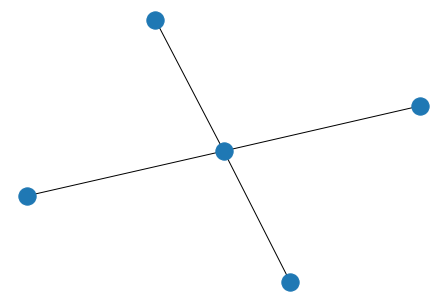

In [2]:
G = nx.star_graph(4)
h = np.zeros(len(G.nodes.keys()))

nx.draw(G)


def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [3]:
def init_allocation(budget_pos,budget_neg):
    periph = lambda hub,budget: (budget-hub)/4.0

    hub_pos= random.uniform(0,budget_pos)
    hub_neg = random.uniform(0,budget_neg)
    per_pos = periph(hub_pos,budget_pos)
    per_neg = periph(hub_neg,budget_neg)

    init_pos = np.array([hub_pos,per_pos,per_pos,per_pos,per_pos])
    init_neg = np.array([hub_neg,per_neg,per_neg,per_neg,per_neg])
    init_alloc = np.column_stack((init_pos,init_neg)).T
    return init_alloc



In [ ]:
b = np.zeros(len(G.nodes.keys()))
budget_pos=2.0
budget_neg=2.0


system = ising.mf_ising_system(G,b,iim_iter=5000,iim_tol_fac=1e-5)


beta=1.0

iters=20

pos_degrees=[]
neg_degrees=[]

for i in range(iters):
    init_external=init_allocation(budget_pos,budget_neg)
    control_pos,control_neg,mag=system.MF_IIM(budget_pos,budget_neg,beta,init_alloc=init_external)
    controls_pos = system.control_field_history_pos
    controls_neg = system.control_field_history_neg
    temp_pos=[]
    temp_neg=[]
    for idx in range(controls_pos.shape[0]):
        temp_pos.append(controls_pos[idx][0])
        temp_neg.append(controls_neg[idx][0])
    
    pos_degrees.append(temp_pos)
    neg_degrees.append(temp_neg)


In [ ]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22,'figure.figsize':(12,10),'axes.labelsize': 'large',
                           'axes.titlesize':18})

fig,ax=plt.subplots(figsize=(10,10))

n=1

for idx,run in enumerate(pos_degrees):
    
    ax.plot(run[::n],neg_degrees[idx][::n],label='Convergence paths',c='blue',linestyle='dashed',alpha=0.2)
    ax.set_xlabel('Budget on hub node - positive agent')
    ax.set_ylabel('Budget on hub node - negative agent')
    ax.scatter(run[0],neg_degrees[idx][0],c='green',label='start points',s=60)
    ax.scatter(run[-1],neg_degrees[idx][-1],c='red',label='final points')

    hand, labl = ax.get_legend_handles_labels()
    handout=[]
    lablout=[]
    for h,l in zip(hand,labl):
        if l not in lablout:
            lablout.append(l)
            handout.append(h)
    ax.legend(handout, lablout,loc='best')
    
pos_string = '$Budget_{pos}$'
neg_string = '$Budget_{neg}$'
#ax.set_title(r'Convergence paths for {}={} {}={}'.format(pos_string,budget_pos,neg_string,budget_neg))

In [122]:
X = dict.fromkeys([1,2],None)
Y = dict.fromkeys([1,2],None)

In [145]:
budget_pos=1.0
budget_neg=5.0


beta=1.0
b = np.zeros(len(G.nodes.keys()))
iters=100
iim_iter=5000


system = ising.mf_ising_system(G,b,iim_iter=iim_iter,iim_tol_fac=1e-5)


controlArr = []
for i in range(iters):
    init_external=init_allocation(budget_pos,budget_neg)
    control_pos,control_neg,mag=system.MF_IIM(budget_pos,budget_neg,beta,init_alloc=init_external,progress=False)
    temp=np.array(system.mag_history)

    controlArr.append(list(np.sum(temp,axis=1)))


Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to converge after 5000 iterations
Failed to conver

In [146]:
from itertools import zip_longest

x=np.nanmean(np.array(list(zip_longest(*controlArr)),dtype=float),axis=0)
y = np.nanstd(np.array(list(zip_longest(*controlArr)),dtype=float),axis=0,ddof=0)

if beta==0.2:
    X[1]=x.T
    Y[1]=y.T
elif beta==1.0:
    X[2]=x.T
    Y[2]=y.T

print(control_pos)
print(control_neg)


system.state.aitken_method(system.mag_history[-1],beta,control_pos-control_neg)

[0. 1. 0. 0. 0.]
[4.99992670e+00 3.78776147e-05 2.54233941e-07 3.50537945e-05
 1.14198336e-07]


array([-9.99999059e-01, -3.69366619e-05, -7.61593868e-01, -7.61608482e-01,
       -7.61593809e-01])

Text(0.5, 1.0, '$\\beta$=1.0')

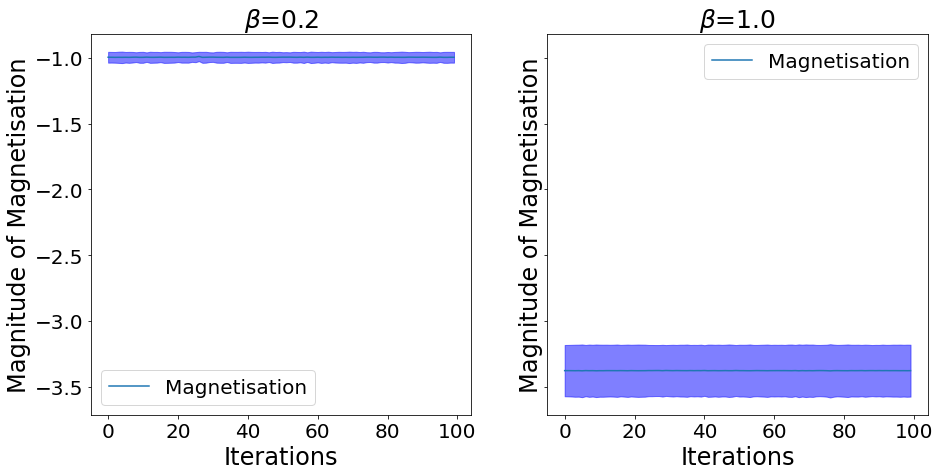

In [147]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20,'figure.figsize':(15,7),'axes.labelsize': 'large',
                           'axes.titlesize':18})
s=25

fig,ax=plt.subplots(ncols=2,sharex=True,sharey=True)

xarray=np.arange(0,len(X[1]),1)


ax[0].plot(X[1],label='Magnetisation')
ax[0].fill_between(xarray,X[1]+Y[1],X[1]-Y[1],**{'color':'blue','alpha':0.5})
ax[0].legend()

ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Magnitude of Magnetisation')
ax[0].set_title(r'$\beta$=0.2',fontsize=s)

xarray=np.arange(0,len(X[2]),1)
ax[1].plot(X[2],label='Magnetisation')
ax[1].fill_between(xarray,X[2]+Y[2],X[2]-Y[2],**{'color':'blue','alpha':0.5})
ax[1].legend()

ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Magnitude of Magnetisation')
ax[1].set_title(r'$\beta$=1.0',fontsize=s)





In [ ]:
x= np.array([1,3,4])

(x>1).all()

In [ ]:
a=controlArr.copy()
s=min([v.shape[0] for v in a])
x=np.array([v[:s] for v in a])

X = np.zeros((len(a),s,2))

for idx in range(x.shape[0]):
    for jx in range(x.shape[1]):
        X[idx,jx,0]=sum(x>0 for x in x[idx,jx])/len(x[idx,jx])
        X[idx,jx,1]=sum(x<0 for x in x[idx,jx])/len(x[idx,jx])

        
        
mean = np.mean(X,axis=0)
std=np.std(X,axis=0)

In [ ]:
import matplotlib

    
matplotlib.rcParams.update({'font.size': 20,'figure.figsize':(25,5),'axes.labelsize': 'large',
                           'axes.titlesize':18})




fig,ax = plt.subplots(ncols=system.graph_size)
gradients = np.empty((np.array(system.control_field_history_pos).shape))

for i in range(np.array(system.control_field_history_pos).shape[1]):
    
    gradients[:,i] =np.gradient(system.control_field_history_pos[:,i])
    ax[i].plot(gradients[:,i])


fig.suptitle('Positive Agent')
plt.tight_layout()
plt.show()



fig,ax = plt.subplots(ncols=5)
gradients_negative = np.empty((np.array(system.control_field_history_pos).shape))

for i in range(np.array(system.control_field_history_pos).shape[1]):
    
    gradients_negative[:,i] =np.gradient(system.control_field_history_neg[:,i])
    ax[i].plot(gradients_negative[:,i])


fig.suptitle('Negative Agent')
plt.tight_layout()
plt.show()

In [ ]:
exp_beta_list = np.logspace(-0.7, 0.5, endpoint=True,num=10)
budget_pos=1.0
budget_neg=1.0
y = np.zeros(len(exp_beta_list))
control_history_pos=[]
control_history_neg=[]
mag_history=[]

system = mf_ising_system(G,h,lr_1,lr_2,iim_iter=10000,fixed_point_iter=int(5*1e5),fp_tol_fac=10-5,iim_tol_fac=1e-3,
                         momentum=1.1,optimiser_type='sgd')
for i,beta in enumerate(exp_beta_list):
    control_pos,control_neg,mag=system.MF_IIM(budget_pos,budget_neg,beta)
    control_history_pos.append(control_pos)
    control_history_neg.append(control_neg)
    mag_history.append(mag)
    if i%10==0:
        print(i,beta)

print('FINISHED')    

In [ ]:
import matplotlib

beta_crit=0.5
    
matplotlib.rcParams.update({'font.size': 14,'figure.figsize':(10,5),'axes.labelsize': 'large',
                           'axes.titlesize':18})

def average_degree(control,budget):
    return np.sum([G.degree[i]*con for i,con in enumerate(control)])/budget





avs_deg_pos=np.zeros(len(control_history_pos))
avs_deg_neg=np.zeros(len(control_history_pos))


for it,control in enumerate(control_history_pos):
    average_degree_pos = average_degree(control,budget_pos)
    avs_deg_pos[it]=average_degree_pos
    
for it,control in enumerate(control_history_neg):

    average_degree_neg = -average_degree(control,budget_neg)
    avs_deg_neg[it]=average_degree_neg

fig,ax = plt.subplots(figsize=(9,5))



ax.scatter(exp_beta_list,avs_deg_pos,linewidth=3,label='Positive Agent, budget={}'.format(budget_pos))
ax.scatter(exp_beta_list,avs_deg_neg,linewidth=3,label='Negative Agent, budget={}'.format(budget_neg))

ax.set_xscale(value='log')

ax.vlines(beta_crit,ymin=min([min(avs_deg_pos),min(avs_deg_neg)]),ymax=max([max(avs_deg_pos),max(avs_deg_neg)])
          ,linestyles='dashed',color='black',label=r'$\beta_{crit}$')



ax.set_xticks([0.2,0.3,0.5,1.0,2.0, 3.0])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ylabel('Average degree')
ax.set_xlabel(r'Interaction Strenght ($\beta$)')
ax.legend()
plt.show()


In [ ]:
lr_1